In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [45]:
trip = pd.read_csv("../data/trip.csv")
weather = pd.read_csv("../data/weather.csv")

In [9]:
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [10]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30,0,6,NaN,277,94107


In [14]:
trip.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,669959.000000,669959.000000,669959.000000,669959.000000
mean,460382.009899,1107.949846,57.851876,57.837438,427.587620
std,264584.458487,22255.437020,17.112474,17.200142,153.450988
min,4069.000000,60.000000,2.000000,2.000000,9.000000
25%,231082.500000,344.000000,50.000000,50.000000,334.000000
50%,459274.000000,517.000000,62.000000,62.000000,440.000000
75%,692601.000000,755.000000,70.000000,70.000000,546.000000
max,913460.000000,17270400.000000,84.000000,84.000000,878.000000


In [50]:
duration_date = trip[trip["duration"] < 10000]
duration_date["start_date"] = duration_date["start_date"].str.split(" ").apply(pd.Series, 1)[0]
duration_date = duration_date.groupby(["start_date"]).median()["duration"]

/home/dat/.Envs/scikit-learn/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


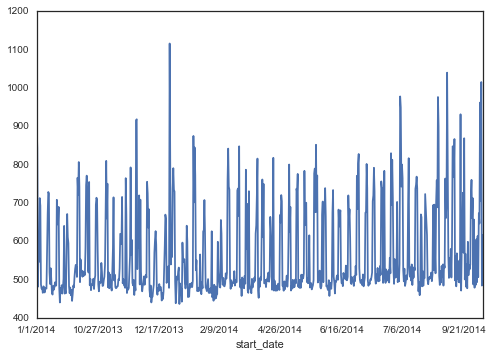

In [51]:
duration_date.plot(x="start_date", y="duration")